In [1]:
# Standard tools

import os, sys 
import numpy as np
import scipy
from copy import deepcopy
import pickle
import CBcm
import matplotlib.pyplot as plt
import jp_mpl as jplot

In [2]:
settings_file = '/home/jp/projects/atm_nu/ddm_results/final_settings/common_settings_daemon.pkl'
settings = pickle.load(open(settings_file, 'rb'))
zfac = pickle.load(open('zfac_lib_smart.pkl', 'rb'), encoding='latin1')

In [3]:
def get_vlist(target, plist):
    vlist = []
    for onep in plist:
        parameter = zfac[onep]
        value = parameter[0]
        error = parameter[1]
        scale = target/(error/value)
        vlist.append(scale)
    return vlist

In [4]:
all_keys = zfac.keys()

In [59]:
savefig = True

### Formatting the keys

In [6]:
sorted_raw = [
              'pi+_31G',
              'pi-_31G',
              'K+_31G',
              'K-_31G',
              'pi+_158G',
              'pi-_158G',
              'K+_158G',
              'K-_158G', 
              'p_158G',
              'n_158G',

              'pi+_20T',
              'pi-_20T',
              'pi+_2P',
              'pi-_2P',
              'K+_2P',
              'K-_2P',
              'p_2P',
              'n_2P',
               
               'GSF_1',
               'GSF_2',
               'GSF_3',
               'GSF_4',
               'GSF_5',
               'GSF_6',
              ]

In [7]:
#sorted_raw = deepcopy(sorted_keys)
sorted_keys = []
for onekey in sorted_raw:
    sorted_keys.append(settings['param_legend'][onekey])

### Loading the results

In [8]:
#fitname = 'prd22_qf2_v17_postPrior' #'prd22_qf2_v17_noScale_final'
#fitname = 'prd22_daemon_v5' #'prd22_qf2_v17_noScale_final'
fitname = 'daemon_prd_submission'

calibration_file = '/home/jp/projects/atm_nu/ddm_results/'+fitname+'.pkl'

with open(calibration_file, 'rb') as data_file:
    result = pickle.load(data_file, encoding='latin1')

In [9]:
result['flux_parameters']

{'K+_2P': [7.820818843962893, False, -19, 19, 0, 10],
 'p_2P': [11.134413962933372, False, -16, 16, 0.0, 6],
 'pi-_158G': [4.1738636136132925, False, -10, 10, 0.0, 1],
 'pi+_2P': [-4.488452863141433, False, -5.0, 5.0, 0.0, 1.8],
 'K-_2P': [-14.21597019279582, False, -25, 30, 10.0, 20.0],
 'K-_31G': [-0.28476097628023034, False, -10, 10, 0.0, 1],
 'n_158G': [2.0377377947713864, False, -10, 10, 0.0, 1],
 'pi+_31G': [-3.7542329814921276, False, -10, 10, 0.0, 1],
 'K+_158G': [0.4438622541522168, False, -10, 10, 0.0, 1],
 'K-_158G': [0.26428624374487697, False, -10, 10, 0.0, 1],
 'pi-_20T': [-3.99787499612449, False, -33, 33, 0, 10],
 'pi+_158G': [-0.03591851701501514, False, -10, 10, 0.0, 1],
 'p_158G': [0.282501057257182, False, -10, 10, 0.0, 1],
 'GSF_4': [0.6637213790771828, False, -4, 4, 0.0, 1],
 'GSF_5': [-2.4364838357566025, False, -4, 4, 0.0, 1],
 'GSF_6': [0.6286089704519409, False, -4, 4, 0.0, 1],
 'GSF_1': [0.8277645918100918, False, -4, 4, 0.0, 1],
 'GSF_2': [0.4109824695038675

### Format the results in units of original error

In [10]:
# Do the table with original error and how they moved
yvalues = np.zeros(len(sorted_keys))
xvalues = np.zeros_like(yvalues)
xerrors = np.zeros_like(yvalues)
for ik in range(len(sorted_keys)):
    if 'vhe2' in sorted_raw[ik]:
        continue
    fit_value = result['params'][sorted_raw[ik]]['value']
    fit_error = result['params'][sorted_raw[ik]]['error']
    
    yvalues[ik] = ik
    xvalues[ik] = fit_value / result['flux_parameters'][sorted_raw[ik]][5]
    xerrors[ik] = fit_error / result['flux_parameters'][sorted_raw[ik]][5]


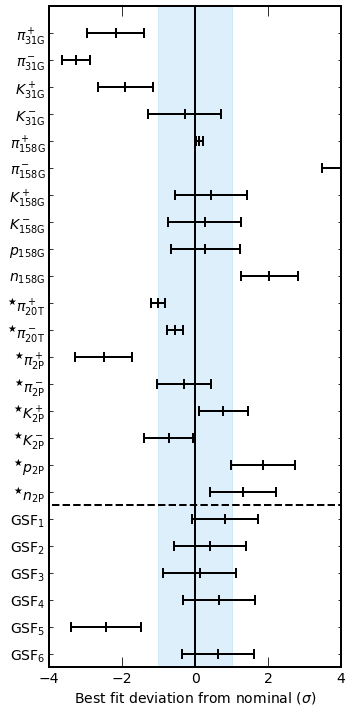

In [11]:
fig = plt.figure(figsize=(5,10))
ax = fig.add_subplot(111)
ax.errorbar(xvalues, yvalues[::-1], xerr=xerrors, yerr=0., 
            marker = '+', markersize=10,
            linestyle='none', capsize=5, color='C0')
ax.set_yticks(range(len(sorted_keys)))
ax.set_yticklabels(sorted_keys[::-1])
ax.tick_params(which='both',
               bottom=True, top=True, left=True, right=True, direction="in")
plt.axvline(0,0,1,color='k')
plt.axhline(5.5, -5, 5, color = 'k', linestyle = '--')
plt.fill_betweenx([-2,len(sorted_keys)+2], -1, 1, 
                 color='C3', alpha=0.2)
plt.xlim([-4,4])
plt.ylim(-0.5, len(sorted_keys))
plt.xlabel(r'Best fit deviation from nominal ($\sigma$)')
plt.grid(False)
plt.tight_layout()

if savefig:
    fig.savefig('/home/jp/projects/atm_nu/ddm_results/muon_results/results_figure_daemonX.pdf')

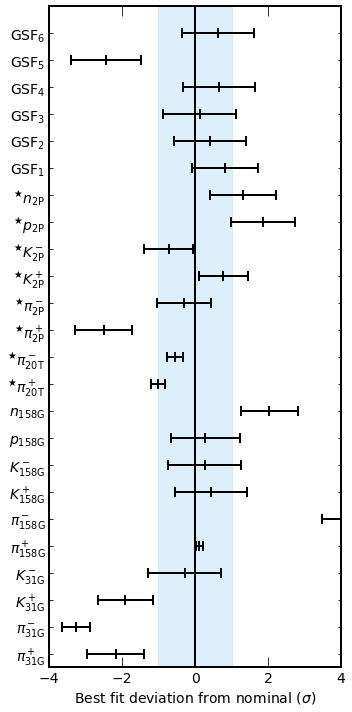

In [12]:
fig = plt.figure(figsize=(5,10))
ax = fig.add_subplot(111)
ax.errorbar(xvalues, yvalues, xerr=xerrors, yerr=0., 
            marker = '+', markersize=10,
            linestyle='none', capsize=5, color='C0')
ax.set_yticks(range(len(sorted_keys)))
ax.set_yticklabels(sorted_keys)
plt.axvline(0,0,1,color='k')
plt.axhline(-5.5, -5, 5, color = 'k', linestyle = '--')
plt.fill_betweenx([-2,len(sorted_keys)+2], -1, 1, 
                 color='C3', alpha=0.2)
ax.tick_params(which='both',
               bottom=True, top=True, left=True, right=True, direction="in")
plt.xlim([-4,4])
plt.ylim(-0.5, len(sorted_keys))
plt.xlabel(r'Best fit deviation from nominal ($\sigma$)')
plt.grid(False)
plt.tight_layout()

if savefig:
    fig.savefig('/home/jp/projects/atm_nu/ddm_results/muon_results/results_figure_daemonX_r.pdf')

### Do this for the n-1 results

In [31]:
indir = '/home/jp/projects/atm_nu/ddm_results/nminusone_daemonx'
fnames_full = os.listdir(indir)
fnames_full.sort()
tests = []
for fname in fnames_full:
    if 'daemon' in fname and '_no' in fname and 'pkl' in fname and not 'ams' in fname:
        tests.append(fname)

In [32]:
alltests = [calibration_file]+tests
labels = []
for i, tst in enumerate(alltests):
    if i == 0:
        labels.append('Full fit')
        continue
    labels.append('w/o ' +(tst.split('_no')[-1].rstrip('.pkl')).upper())
alltests

['/home/jp/projects/atm_nu/ddm_results/daemon_prd_submission.pkl',
 'daemon_prd_submission_nobess.pkl',
 'daemon_prd_submission_nocms.pkl',
 'daemon_prd_submission_nodeis.pkl',
 'daemon_prd_submission_nol3c.pkl',
 'daemon_prd_submission_nominos.pkl',
 'daemon_prd_submission_nomutron.pkl',
 'daemon_prd_submission_noopera.pkl']

In [33]:
for i in range(len(labels)):
    if 'BESS' in labels[i]:
        labels[i] = 'w/o BESS-TeV'
    if 'L3C' in labels[i]:
        labels[i] = 'w/o L3+C'
print(labels)

['Full fit', 'w/o BESS-TeV', 'w/o CMS', 'w/o DEIS', 'w/o L3+C', 'w/o MINOS', 'w/o MUTRON', 'w/o OPERA']


In [34]:
def getResults(fname):
    #print(os.path.join(indir, fname))
    result = pickle.load(open(os.path.join(indir, fname), 'rb'), encoding='latin1')
    # Do the table with original error and how they moved
    yvalues = np.zeros(len(sorted_keys))
    xvalues = np.zeros_like(yvalues)
    xerrors = np.zeros_like(yvalues)
    for ik in range(len(sorted_keys)):
        if 'vhe2' in sorted_raw[ik]:
            continue
        fit_value = result['params'][sorted_raw[ik]]['value']
        fit_error = result['params'][sorted_raw[ik]]['error']

        yvalues[ik] = ik
        xvalues[ik] = fit_value / result['flux_parameters'][sorted_raw[ik]][5]
        xerrors[ik] = fit_error / result['flux_parameters'][sorted_raw[ik]][5]
    return xvalues, xerrors, yvalues

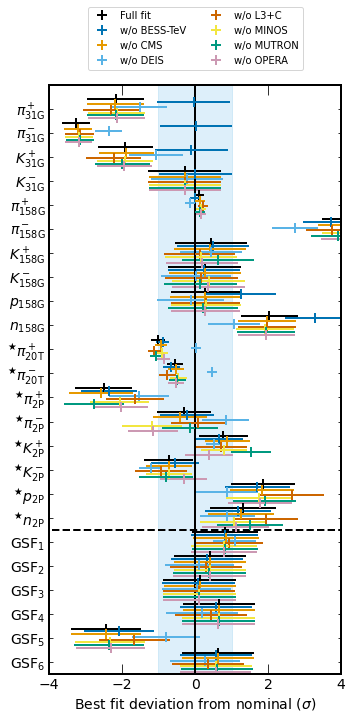

In [22]:
fig = plt.figure(figsize=(5,10))
ax = fig.add_subplot(111)
errors = np.zeros((len(sorted_keys), len(tests)+1))

fits = np.zeros_like(errors)
for itest, fname in enumerate(alltests):
    xvalues, xerrors, yvalues = getResults(fname)
    

    ax.errorbar(xvalues, yvalues[::-1]+0.4-0.8*itest/7., xerr=xerrors, yerr=0., 
                marker = '+', markersize=10,
                linestyle='none', capsize=0, #color='C0',
               label = labels[itest])
ax.set_yticks(range(len(sorted_keys)))
ax.set_yticklabels(sorted_keys[::-1])
ax.tick_params(which='both',
               bottom=True, top=True, left=True, right=True, direction="in")
plt.axvline(0,0,1,color='k')
plt.axhline(5.5, -5, 5, color = 'k', linestyle = '--')
plt.fill_betweenx([-2,len(sorted_keys)+2], -1, 1, 
                 color='C3', alpha=0.2)
plt.xlim([-4,4])
plt.ylim(-0.5, len(sorted_keys))
plt.xlabel(r'Best fit deviation from nominal ($\sigma$)')
plt.grid(False)

plt.legend(bbox_to_anchor=(0.5, 1.14), loc='upper center', ncol=2)
plt.tight_layout()
if savefig:
    fig.savefig('/home/jp/projects/atm_nu/ddm_results/muon_results/results_figure_daemonx_nminus1.pdf')

### Systematic parameters figure

In [23]:
syst_params = []
for param in result['params']:
    if param in result['flux_parameters']:
        continue
    if not result['params'][param]['is_fixed']:
        syst_params.append(param)
syst_params = np.sort(syst_params)
print(syst_params)

['bess_align' 'bess_finres' 'l3c_align' 'l3c_bfield' 'l3c_eloss'
 'l3c_normHor' 'l3c_normVert' 'l3c_overb' 'l3c_pres' 'mn_escale']


In [28]:
syst_labels = {
'bess_align': 'BESS-TeV alignment',
'bess_finres': 'BESS-TeV resolution',
'l3c_align': 'L3+C alignment',
 'l3c_bfield':'L3+C $B$ field',
 'l3c_eloss': 'L3+C $E$ losses',
 'l3c_normHor':'L3+C horizontal scale',
 'l3c_normVert':'L3+C vertical scale',
    'l3c_overb':'L3+C overburden',
 'l3c_pres':'L3+C $p$ resolution',
 'mn_escale': 'MINOS $E$ scale'}

In [29]:
yvalues = np.zeros(len(syst_params))
xvalues = np.zeros_like(yvalues)
xerrors = np.zeros_like(yvalues)
slabels = []
for ik in range(len(syst_params)):
    fit_value = result['params'][syst_params[ik]]['value']
    fit_error = result['params'][syst_params[ik]]['error']
    slabels.append(syst_labels[syst_params[ik]])
    
    yvalues[ik] = ik
    xvalues[ik] = fit_value# / result['params'][syst_params[ik]][5]
    xerrors[ik] = fit_error 

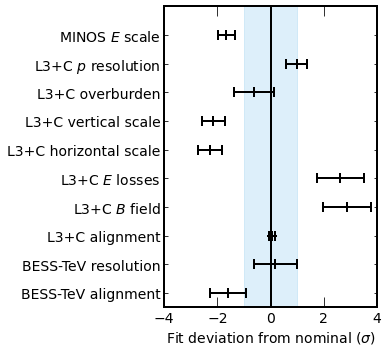

In [30]:
fig = plt.figure(figsize=(5.5,5))
ax = fig.add_subplot(111)
ax.errorbar(xvalues, yvalues, xerr=xerrors, yerr=0., 
            marker = '+', markersize=10,
            linestyle='none', capsize=5, color='C0')
ax.set_yticks(range(len(syst_params)))
ax.set_yticklabels(slabels)
plt.axvline(0,0,1,color='k')
#plt.axhline(5.5, -5, 5, color = 'k', linestyle = '--')
plt.fill_betweenx([-2,len(syst_params)+2], -1, 1, 
                 color='C3', alpha=0.2)
ax.tick_params(which='both',
               bottom=True, top=True, left=True, right=True, direction="in")
plt.xlim([-4,4])
plt.ylim(-0.5, len(syst_params))
plt.xlabel(r'Fit deviation from nominal ($\sigma$)')
plt.grid(False)
plt.tight_layout()
plt.subplots_adjust(wspace=20)



if savefig:
    fig.savefig('/home/jp/projects/atm_nu/ddm_results/muon_results/syst_figure_daemonX.pdf')

## N-1 systematic parameters

In [40]:
def getResultsSyst(fname):
    #print(os.path.join(indir, fname))
    result = pickle.load(open(os.path.join(indir, fname), 'rb'), encoding='latin1')
    # Do the table with original error and how they moved
    yvalues = np.zeros(len(syst_params))
    xvalues = np.zeros_like(yvalues)
    xerrors = np.zeros_like(yvalues)
    for ik in range(len(syst_params)):
        if 'vhe2' in sorted_raw[ik]:
            continue
        if syst_params[ik] in result['params']:
            fit_value = result['params'][syst_params[ik]]['value']
            fit_error = result['params'][syst_params[ik]]['error']
            xvalues[ik] = fit_value #/ result['flux_parameters'][sorted_raw[ik]][5]
            xerrors[ik] = fit_error #/ result['flux_parameters'][sorted_raw[ik]][5]
        else:
            xvalues[ik] = 0.
            xerrors[ik] = 0.

        yvalues[ik] = ik

    return xvalues, xerrors, yvalues

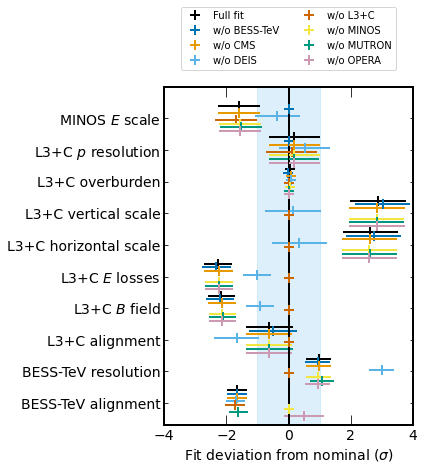

In [60]:
fig = plt.figure(figsize=(6,7.))
ax = fig.add_subplot(111)
errors = np.zeros((len(syst_params), len(tests)+1))

fits = np.zeros_like(errors)
for itest, fname in enumerate(alltests):
    xvalues, xerrors, yvalues = getResultsSyst(fname)
    

    ax.errorbar(xvalues, yvalues[::-1]+0.4-0.8*itest/7., xerr=xerrors, yerr=0., 
                marker = '+', markersize=10,
                linestyle='none', capsize=0, #color='C0',
               label = labels[itest])
ax.set_yticks(range(len(syst_params)))
ax.set_yticklabels(slabels)
plt.axvline(0,0,1,color='k')
#plt.axhline(5.5, -5, 5, color = 'k', linestyle = '--')
plt.fill_betweenx([-2,len(syst_params)+2], -1, 1, 
                 color='C3', alpha=0.2)
ax.tick_params(which='both',
               bottom=True, top=True, left=True, right=True, direction="in")
plt.xlim([-4,4])
plt.ylim(-0.7, len(syst_params))
plt.xlabel(r'Fit deviation from nominal ($\sigma$)')
plt.grid(False)
plt.tight_layout()
plt.subplots_adjust(wspace=20)

plt.legend(bbox_to_anchor=(0.5, 1.25), loc='upper center', ncol=2)
plt.tight_layout()

if savefig:
    fig.savefig('/home/jp/projects/atm_nu/ddm_results/muon_results/syst_figure_daemonX_nminus1.pdf')

## Table of results 

In [17]:
formatted_labels = []
formatted_labels.append(['_pi+', '$\\pi+$'])
formatted_labels.append(['_pi-', '$\\pi-$'])
formatted_labels.append(['_p','$p$'])
formatted_labels.append(['_n','$n$'])
formatted_labels.append(['_K-','$K-$'])
formatted_labels.append(['_K+','$K+$'])

In [18]:
# New sorting

### JP did not finish this

sorted_keys = [
            'pi+_31G',
              'pi-_31G',
              'K+_31G',
              'K-_31G',
              'pi+_158G',
              'pi-_158G',
              'K+_158G',
              'K-_158G', 
              'p_158G',
              'n_158G',

              'pi+_20T',
              'pi-_20T',
              'pi+_2P',
              'pi-_2P',
              'K+_2P',
              'K-_2P',
              'p_2P',
              'n_2P',
]
sorted_raw = deepcopy(sorted_keys)

for ik in range(len(sorted_keys)):
    sorted_keys[ik] = '_'+sorted_keys[ik].split('_')[0]

for il in range(len(formatted_labels)):
    #print(label, formatted_labels[label])
    for ik in range(len(sorted_keys)):
        sorted_keys[ik] = sorted_keys[ik].replace(formatted_labels[il][0], formatted_labels[il][1])


In [19]:
sorted_keys

['$\\pi+$',
 '$\\pi-$',
 '$K+$',
 '$K-$',
 '$\\pi+$',
 '$\\pi-$',
 '$K+$',
 '$K-$',
 '$p$',
 '$n$',
 '$\\pi+$',
 '$\\pi-$',
 '$\\pi+$',
 '$\\pi-$',
 '$K+$',
 '$K-$',
 '$p$',
 '$n$']

In [20]:
result['flux_parameters']

{'K+_2P': [7.820818843962893, False, -19, 19, 0, 10],
 'p_2P': [11.134413962933372, False, -16, 16, 0.0, 6],
 'pi-_158G': [4.1738636136132925, False, -10, 10, 0.0, 1],
 'pi+_2P': [-4.488452863141433, False, -5.0, 5.0, 0.0, 1.8],
 'K-_2P': [-14.21597019279582, False, -25, 30, 10.0, 20.0],
 'K-_31G': [-0.28476097628023034, False, -10, 10, 0.0, 1],
 'n_158G': [2.0377377947713864, False, -10, 10, 0.0, 1],
 'pi+_31G': [-3.7542329814921276, False, -10, 10, 0.0, 1],
 'K+_158G': [0.4438622541522168, False, -10, 10, 0.0, 1],
 'K-_158G': [0.26428624374487697, False, -10, 10, 0.0, 1],
 'pi-_20T': [-3.99787499612449, False, -33, 33, 0, 10],
 'pi+_158G': [-0.03591851701501514, False, -10, 10, 0.0, 1],
 'p_158G': [0.282501057257182, False, -10, 10, 0.0, 1],
 'GSF_4': [0.6637213790771828, False, -4, 4, 0.0, 1],
 'GSF_5': [-2.4364838357566025, False, -4, 4, 0.0, 1],
 'GSF_6': [0.6286089704519409, False, -4, 4, 0.0, 1],
 'GSF_1': [0.8277645918100918, False, -4, 4, 0.0, 1],
 'GSF_2': [0.4109824695038675

In [21]:
### Make my table
addstr = '& & & \\\\ \hline'
for ik in range(len(sorted_keys)):
    if 'GSF' in sorted_raw[ik]:
        continue
    fit_value = result['params'][sorted_raw[ik]]['value']
    fit_error = result['params'][sorted_raw[ik]]['error']
    raw_value = settings['zfactors_labeled'][sorted_raw[ik]][0]
    raw_error = settings['zfactors_labeled'][sorted_raw[ik]][1]#result['flux_parameters'][sorted_raw[ik]][5]
    
    scaled_error = raw_error*result['flux_parameters'][sorted_raw[ik]][5]

    
    new_value = raw_value + fit_value*raw_error
    new_error = raw_error*fit_error
    #print(raw_error, fit_error, new_value)
    
    deviation = (new_value - raw_value)/raw_value
    
    if ik == 0:
        print('\hline $p$C, 31 GeV'+addstr)
    if ik == 4:
        print('\hline $p$C, 158 GeV'+addstr)
    if ik == 10:
        print('\hline $p$C, 20 TeV'+addstr)
    if ik == 12:
        print('\hline $p$C, 2 PeV'+addstr)
        
    print( '  &  '.join([ sorted_keys[ik], ## Name
                       #f"{new_value:.2E}" , # Parameter value
                         "%0.4f" % new_value,
                       ##"%0.1f" % (100*deviation), # Deviation from DDM
                         '$\pm$',
                       "%0.1f" % (100*new_error/new_value) + '\\%'+  '\\\\'])) # Old error in %
    
    


\hline $p$C, 31 GeV& & & \\ \hline
$\pi+$  &  0.0446  &  $\pm$  &  2.5\%\\
$\pi-$  &  0.0224  &  $\pm$  &  4.2\%\\
$K+$  &  0.0035  &  $\pm$  &  36.4\%\\
$K-$  &  0.0015  &  $\pm$  &  28.1\%\\
\hline $p$C, 158 GeV& & & \\ \hline
$\pi+$  &  0.0495  &  $\pm$  &  1.7\%\\
$\pi-$  &  0.0300  &  $\pm$  &  1.9\%\\
$K+$  &  0.0051  &  $\pm$  &  5.0\%\\
$K-$  &  0.0024  &  $\pm$  &  3.4\%\\
$p$  &  0.1539  &  $\pm$  &  3.7\%\\
$n$  &  0.0969  &  $\pm$  &  8.9\%\\
\hline $p$C, 20 TeV& & & \\ \hline
$\pi+$  &  0.0336  &  $\pm$  &  8.2\%\\
$\pi-$  &  0.0224  &  $\pm$  &  8.0\%\\
\hline $p$C, 2 PeV& & & \\ \hline
$\pi+$  &  0.0120  &  $\pm$  &  94.9\%\\
$\pi-$  &  0.0242  &  $\pm$  &  24.0\%\\
$K+$  &  0.0070  &  $\pm$  &  24.4\%\\
$K-$  &  0.0012  &  $\pm$  &  92.3\%\\
$p$  &  0.2312  &  $\pm$  &  15.6\%\\
$n$  &  0.1105  &  $\pm$  &  22.2\%\\


In [22]:
result['flux_parameters']

{'K+_2P': [7.820818843962893, False, -19, 19, 0, 10],
 'p_2P': [11.134413962933372, False, -16, 16, 0.0, 6],
 'pi-_158G': [4.1738636136132925, False, -10, 10, 0.0, 1],
 'pi+_2P': [-4.488452863141433, False, -5.0, 5.0, 0.0, 1.8],
 'K-_2P': [-14.21597019279582, False, -25, 30, 10.0, 20.0],
 'K-_31G': [-0.28476097628023034, False, -10, 10, 0.0, 1],
 'n_158G': [2.0377377947713864, False, -10, 10, 0.0, 1],
 'pi+_31G': [-3.7542329814921276, False, -10, 10, 0.0, 1],
 'K+_158G': [0.4438622541522168, False, -10, 10, 0.0, 1],
 'K-_158G': [0.26428624374487697, False, -10, 10, 0.0, 1],
 'pi-_20T': [-3.99787499612449, False, -33, 33, 0, 10],
 'pi+_158G': [-0.03591851701501514, False, -10, 10, 0.0, 1],
 'p_158G': [0.282501057257182, False, -10, 10, 0.0, 1],
 'GSF_4': [0.6637213790771828, False, -4, 4, 0.0, 1],
 'GSF_5': [-2.4364838357566025, False, -4, 4, 0.0, 1],
 'GSF_6': [0.6286089704519409, False, -4, 4, 0.0, 1],
 'GSF_1': [0.8277645918100918, False, -4, 4, 0.0, 1],
 'GSF_2': [0.4109824695038675